Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as smf
import seaborn as sns

Plotting Histograms


In [48]:
#@title
# Creating a function for subplotting

def sub_plot(data_frame,col,row, plot_type="none"):
  
  fig, ax = plt.subplots(row, col,figsize=(15,15))
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.0,wspace=0.4,hspace=0.4)
  
  
  # pointers
  i = 0
  j = 0
  k = 0

  for var_name in data_frame.columns:

    try:
            # Plot
      if plot_type == 'histogram':
        if col != 1:
          ax[i,j].hist(data_frame[var_name],bins=int(10))
          ax[i,j].set_title(var_name)

        else:
            ax[j].hist(data_frame[var_name],bins=int(10))
            ax[j].set_title(var_name)

      elif plot_type == 'box':

        if col != 1:
          ax[i,j].boxplot(data_frame[var_name])
          ax[i,j].set_title(var_name)

        else:
            ax[j].boxplot(data_frame[var_name])
            ax[j].set_title(var_name)

        
      

      #Increment col pointer
      j += 1

      # Increment row pointer to next row
      if j == col & col != 1:
        i += 1
        j = 0
    except:
      print("GO DS!!")
   

#Load the data 

In [49]:
train_data = pd.read_csv('https://raw.githubusercontent.com/andytambe31/Hackathon_EDA/main/Hackaton/dataset/hackathon.csv')

##Initial anlaysis

In [50]:
#@title
# Get duplicate rows
def getNumOfDuplicateRows(df):
  return(df.duplicated().sum())

# Get duplicate rows
def getDuplicateRows(df):
  return(df.duplicated())

# Get categorical columns
def getCategoricalColumns(df):
  cat_col = [col for col in df.columns if 'object' in str(df[col].dtype) or 'category' in str(df[col].dtype)]
  return(df[cat_col])

# Get categorical columns
def getNumOfCategoricalColumns(df):
  cat_col = [col for col in df.columns if 'object' in str(df[col].dtype) or 'category' in str(df[col].dtype)]
  return(len(cat_col))

# Get categorical columns
def getNumericalColumns(df):
  cat_col = [col for col in df.columns if 'float' in str(df[col].dtype) or 'int' in str(df[col].dtype)]
  return(df[cat_col])

# Get categorical columns
def getNumOfNumericalColumns(df):
  cat_col = [col for col in df.columns if 'float' in str(df[col].dtype) or 'int' in str(df[col].dtype)]
  return(len(cat_col))

def dataDescription(df):

  print('*************************************************')
  # Get number of rows
  print('Number of Rows:',df.shape[0])
  

  # Get number of col
  print('\n*************************************************')
  print('Number of Columns:',df.shape[1])
  

  # Get information about dataframe
  print('\n*************************************************')
  print('General info\n')
  df.info()
  

  # Get categorical column
  print('\n*************************************************')
  numOfCatCol = getNumOfCategoricalColumns(df)
  print('Number of Categorical column: ',numOfCatCol,'\n')
  

  #Display the categorical columns
  if numOfCatCol != 0:
    display(getCategoricalColumns(df))

  # Get numerical column
  print('\n*************************************************')
  numOfNumCol = getNumOfNumericalColumns(df)
  print('Number of Numerical column: ',numOfNumCol,'\n')
  

  #Display the numerical columns
  if numOfNumCol != 0:
    display(getNumericalColumns(df))  

  #Get duplicate rows
  print('\n*************************************************')
  if getNumOfDuplicateRows(df) != 0:
    print('Duplicate rows')
    getDuplicateRows(df)
  else:
    print('No duplicate rows')  
    
  # Display first few rows
  print('\n*************************************************')
  print('Firsts few rows')
  display(df.head())
    
  print('\n*************************************************')
  print('End of Report')

In [51]:
dataDescription(train_data)

*************************************************
Number of Rows: 45211

*************************************************
Number of Columns: 17

*************************************************
General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no



*************************************************
Number of Numerical column:  7 



,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0



*************************************************
No duplicate rows

*************************************************
Firsts few rows


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



*************************************************
End of Report


So we have in total 17 columns & 45211 rows, out of which 10 are categorical & 7 are numerical from our initial analysis. Lets start with our numerical data analysis

In [52]:
train_data_num = getNumericalColumns(train_data)
train_data_cat = getCategoricalColumns(train_data)

##Lets first start with Numerical variables

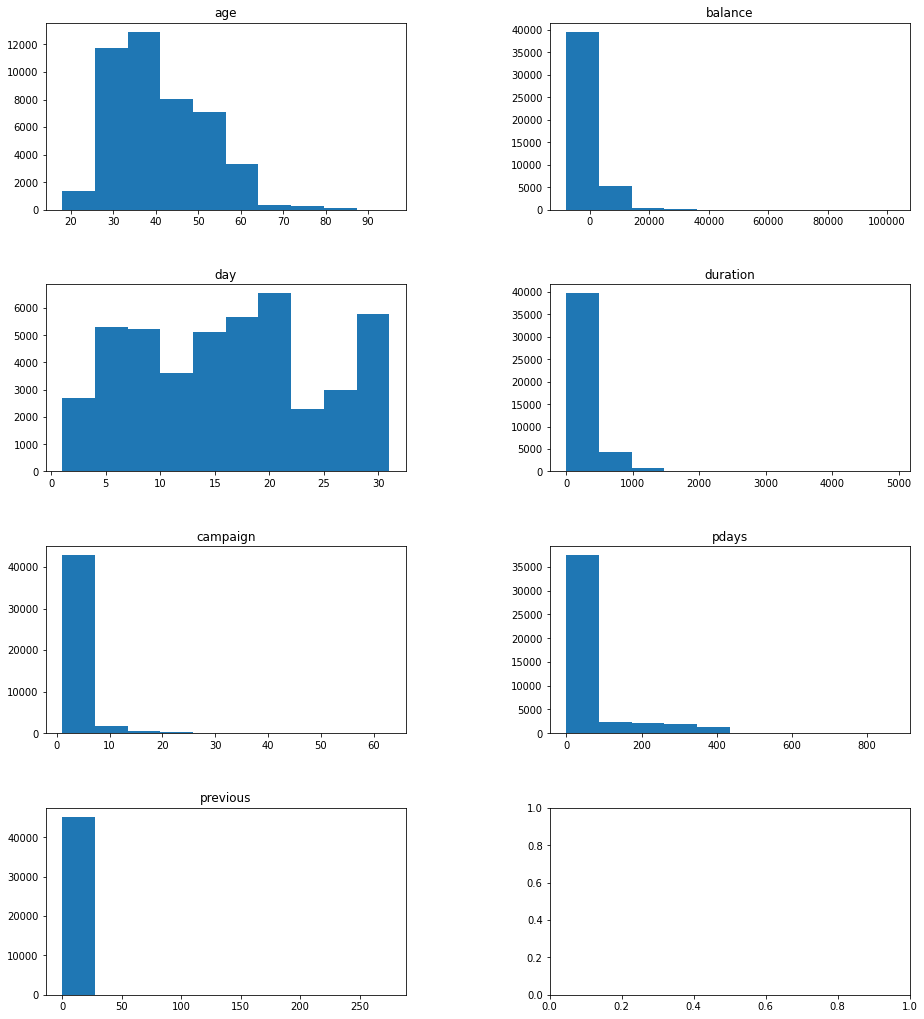

In [53]:
sub_plot(train_data_num,col = 2,row = 4,plot_type = 'histogram')

Data Statistics

In [54]:
train_data_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Feature Scaling



In [55]:
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
train_data_num_scaled = trans.fit_transform(train_data_num)

# Convert the array back to a dataframe
train_data_num_scaled = pd.DataFrame(train_data_num_scaled,columns=train_data_num.columns)

## PLotting the graphs

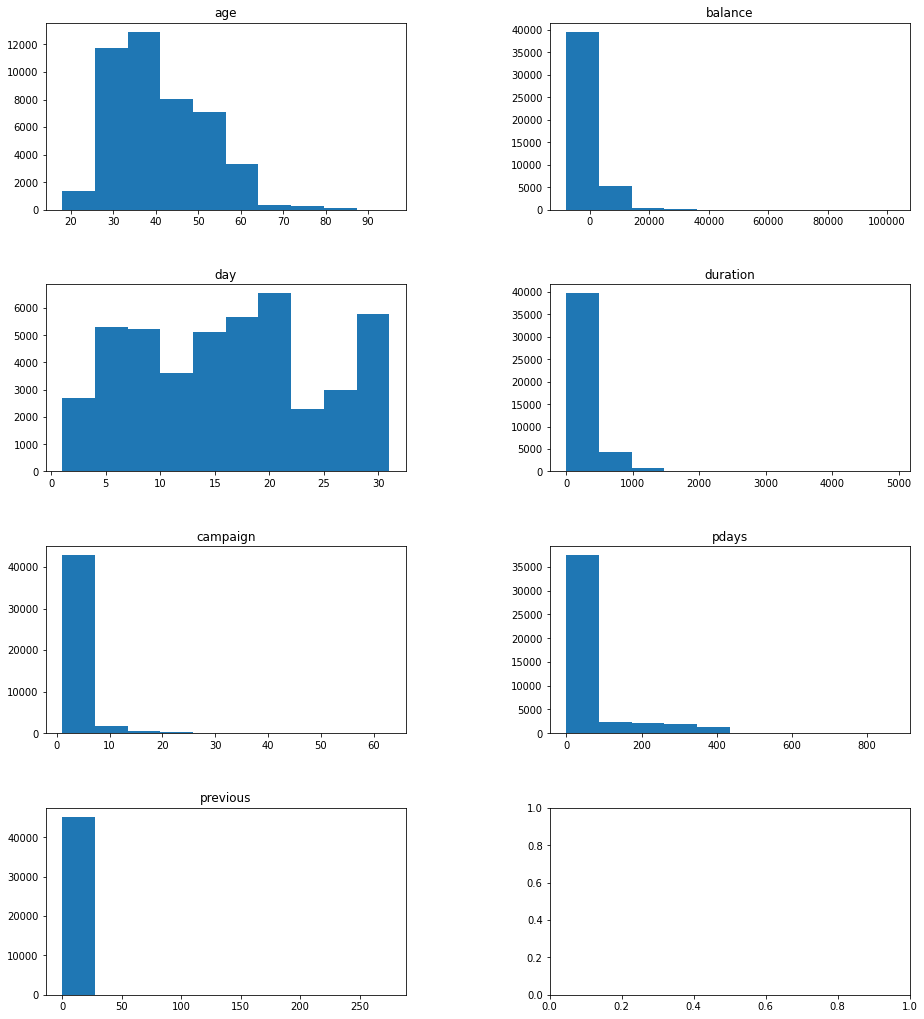

In [56]:
sub_plot(train_data_num,col = 2,row = 4,plot_type = 'histogram')

## Correcting the skews using transformations

In [57]:
# Square root twice
train_data_num_scaled['duration'] = train_data_num_scaled['duration']**(0.25)

#Squareroot
train_data_num_scaled['age'] = train_data_num_scaled['age']**(0.5)
#Multimodal
train_data_num_scaled['day'] = train_data_num_scaled['day']**(0.25)

# Square root twice
train_data_num_scaled['balance'] = train_data_num_scaled['balance']**(0.5)
train_data_num_scaled['pdays'] = train_data_num_scaled['pdays']**(0.5)


## Plotting again..

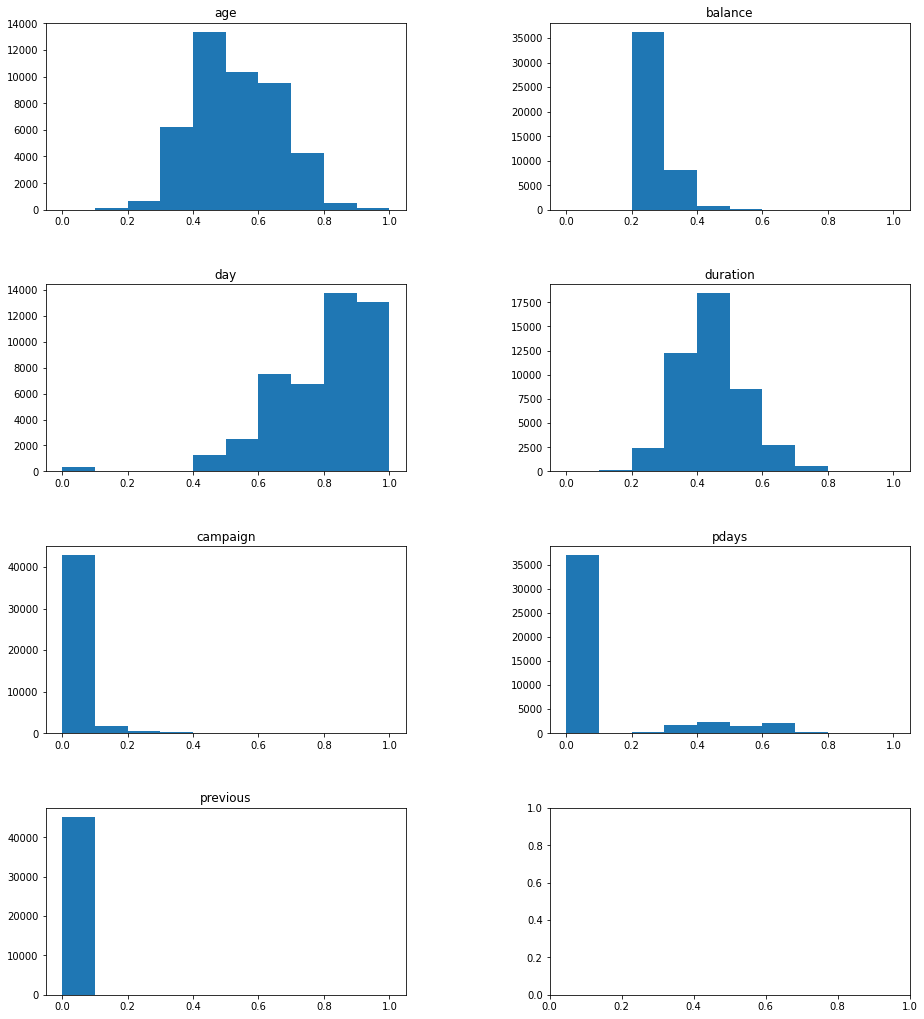

In [58]:
sub_plot(train_data_num_scaled,col = 2,row = 4,plot_type = 'histogram')

## Calculate the heatmap

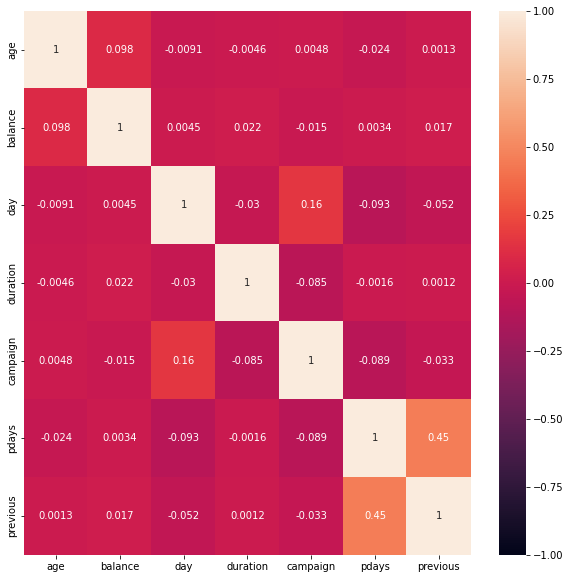

In [59]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(train_data_num.corr(), vmin=-1, vmax=1, annot=True)